## Setup

Load libraries

In [3]:
import os
import pickle
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from snowmodels.utils import SplitterFactory

## Load Data

In [4]:
snotel_with_class = pd.read_parquet('../data/snotel_with_class.parquet')
snotel_with_class.info()
snotel_with_class.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site_name  907 non-null    object 
 1   latitude   907 non-null    float64
 2   longitude  907 non-null    float64
 3   elevation  907 non-null    int64  
 4   triplets   907 non-null    object 
 5   snowclass  907 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 42.6+ KB


,site_name,latitude,longitude,elevation,triplets,snowclass
0,Alexander Lake (1267),61.75,-150.89,160,1267:AK:SNTL,Alpine
1,American Creek (1189),64.79,-141.23,1050,1189:AK:SNTL,Taiga
2,Anchor River Divide (1062),59.86,-151.32,1653,1062:AK:SNTL,Alpine
3,Anchorage Hillside (1070),61.11,-149.67,2080,1070:AK:SNTL,Tundra
4,Aniak (2065),61.58,-159.58,80,2065:AK:SNTL,Taiga


In [5]:
clean_data = pd.read_parquet('../data/clean_data_for_analysis.parquet')
clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2722562 entries, 0 to 6875222
Data columns (total 17 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   Date                   datetime64[ns, UTC]
 1   Site                   object             
 2   SWE                    float64            
 3   Elevation              float64            
 4   Snow_Class             object             
 5   Station_Name           object             
 6   Snow_Depth             float64            
 7   Sturm_DOWY             float64            
 8   Pistochi_DOWY          int64              
 9   DOWY                   int64              
 10  Temp_Diff              float64            
 11  TAVG_lag_7d            float64            
 12  TAVG_lag_14d           float64            
 13  PRECIPITATION_lag_7d   float64            
 14  PRECIPITATION_lag_14d  float64            
 15  PPTWT                  float64            
 16  Snow_Density           

,Date,Site,SWE,Elevation,Snow_Class,Station_Name,Snow_Depth,Sturm_DOWY,Pistochi_DOWY,DOWY,Temp_Diff,TAVG_lag_7d,TAVG_lag_14d,PRECIPITATION_lag_7d,PRECIPITATION_lag_14d,PPTWT,Snow_Density
0,2000-01-01 08:00:00+00:00,301:CA:SNTL,9.398,1886.712,Prairie,Adin Mtn,30.48,1.0,62,93,-0.103584,NaN,NaN,NaN,NaN,NaN,0.308333
1,2000-01-02 08:00:00+00:00,301:CA:SNTL,9.398,1886.712,Prairie,Adin Mtn,35.56,2.0,63,94,-0.103584,NaN,NaN,NaN,NaN,NaN,0.264286
2,2000-01-03 08:00:00+00:00,301:CA:SNTL,9.906,1886.712,Prairie,Adin Mtn,33.02,3.0,64,95,-0.103584,NaN,NaN,NaN,NaN,NaN,0.300000
3,2000-01-04 08:00:00+00:00,301:CA:SNTL,9.906,1886.712,Prairie,Adin Mtn,33.02,4.0,65,96,-0.103584,NaN,NaN,NaN,NaN,NaN,0.300000
4,2000-01-05 08:00:00+00:00,301:CA:SNTL,9.906,1886.712,Prairie,Adin Mtn,35.56,5.0,66,97,-0.103584,NaN,NaN,NaN,NaN,NaN,0.278571


In [6]:
snotel_metadata=(
    clean_data
    .filter(items=['Snow_Class', 'Station_Name', 'Elevation'])
    .drop_duplicates(subset=['Station_Name'])
    .reset_index(drop=True)
)

# snotel_metadata.to_parquet('../data/clean_snotel_metadata.parquet')

snotel_metadata.info()
snotel_metadata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Snow_Class    864 non-null    object 
 1   Station_Name  864 non-null    object 
 2   Elevation     864 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.4+ KB


,Snow_Class,Station_Name,Elevation
0,Prairie,Adin Mtn,1886.712
1,Alpine,Agua Canyon,2712.720
2,Taiga,Albro Lake,2529.840
3,Alpine,Alexander Lake,48.768
4,Maritime,Alpine Meadows,1066.800


In [7]:
# create a folder to save the plots

if not os.path.exists('../plots'):
    os.makedirs('../plots')
else:
    print('Folder already exists')

Folder already exists


## EDA on the Snotel Metadata

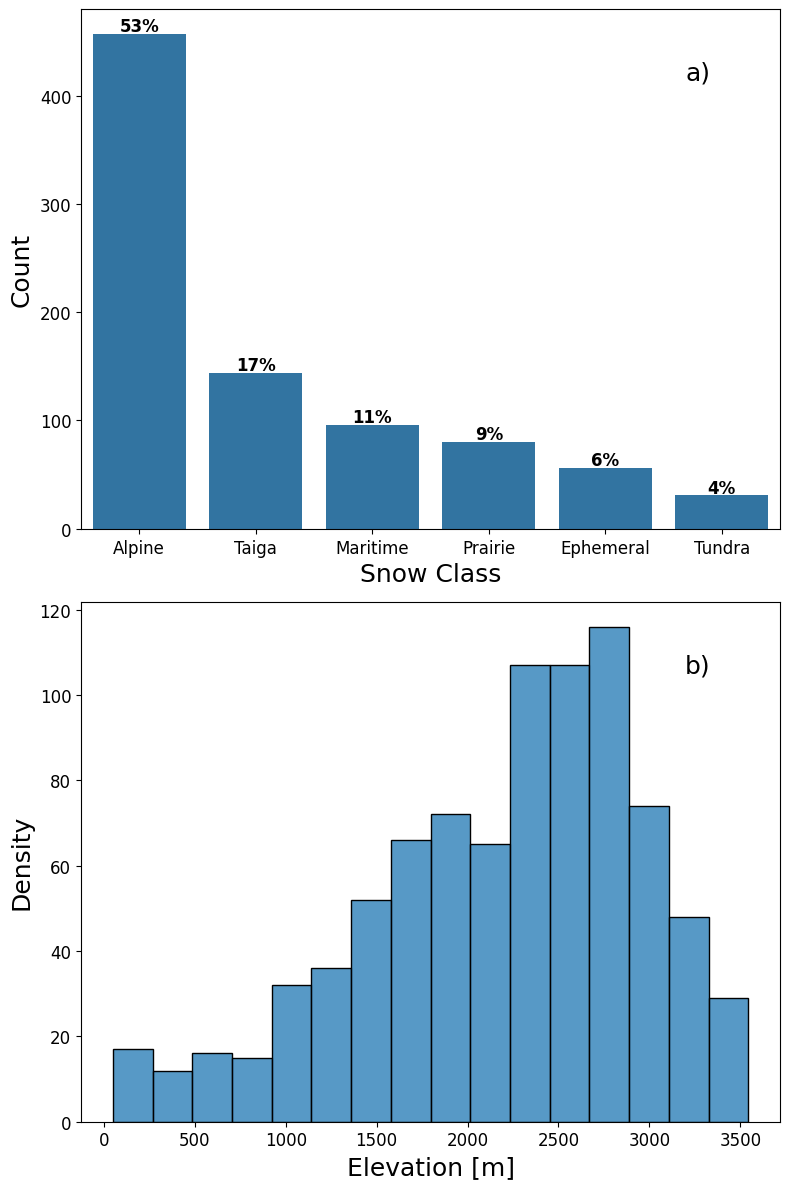

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
sns.countplot(x='Snow_Class', data=snotel_metadata, ax=ax[0], order=snotel_metadata.Snow_Class.value_counts().index, stat="count")
ax[0].set_xlabel('Snow Class', fontsize=18)
ax[0].set_ylabel('Count', fontsize=18)
ax[0].tick_params(labelsize=12)
ax[0].text(0.90, 0.90, 'a)', transform=ax[0].transAxes, fontsize=18, va='top', ha='right')

sns.histplot(x=snotel_metadata.Elevation, kde=False, stat='count', ax=ax[1])
ax[1].set_xlabel('Elevation [m]', fontsize=18)
ax[1].set_ylabel('Density', fontsize=18)
ax[1].tick_params(labelsize=12)
ax[1].text(0.90, 0.90, 'b)', transform=ax[1].transAxes, fontsize=18, va='top', ha='right')

for p in ax[0].patches:
    height = p.get_height()
    to_display = round(height/len(snotel_metadata) *100)
    ax[0].text(p.get_x() + p.get_width() / 2., height + 2.5, f"{to_display}%", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/figure4.jpg', dpi=300, bbox_inches='tight')
plt.show()

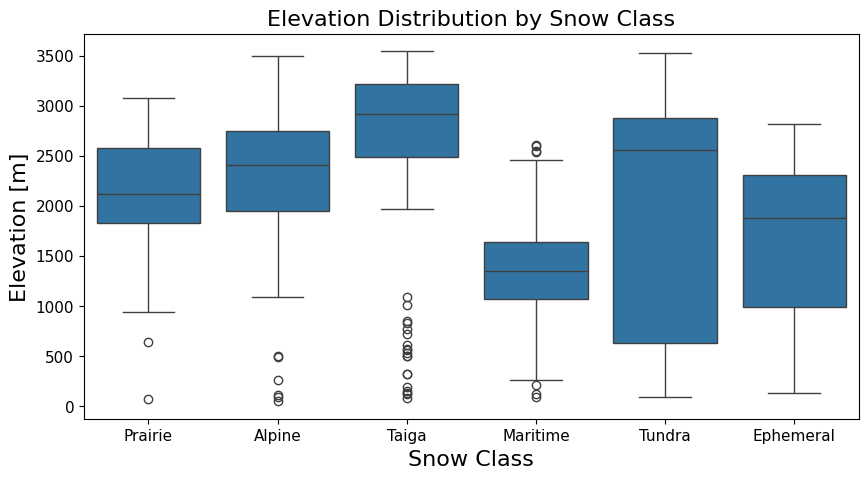

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Snow_Class', y='Elevation', data=snotel_metadata)
plt.xlabel('Snow Class', fontsize=16)
plt.ylabel('Elevation [m]', fontsize=16)
plt.title('Elevation Distribution by Snow Class', fontsize=16)
plt.tick_params(labelsize=11)
plt.show()

In [6]:
print(f"Number of unique sites after data cleaning: {clean_data.Station_Name.nunique()}")

Number of unique sites after data cleaning: 864


In [7]:
unique_states=clean_data.Site.str.split(':').map(lambda x: x[1]).value_counts().sort_values(ascending=False)
unique_months=clean_data.Date.dt.month_name().value_counts().sort_values(ascending=False)

* More plotting on the full dataset

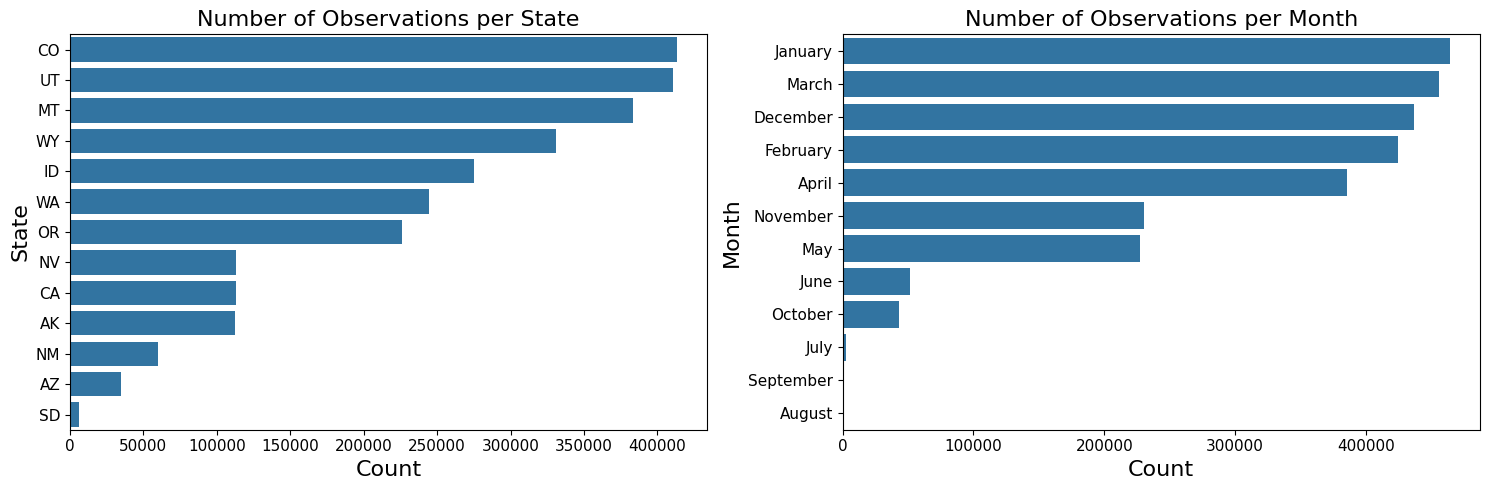

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.barplot(x=unique_states.values, y=unique_states.index, ax=ax[0])
ax[0].set_xlabel('Count', fontsize=16)
ax[0].set_ylabel('State', fontsize=16)
ax[0].set_title('Number of Observations per State', fontsize=16)
ax[0].tick_params(labelsize=11)

sns.barplot(x=unique_months.values, y=unique_months.index, ax=ax[1])
ax[1].set_xlabel('Count', fontsize=16)
ax[1].set_ylabel('Month', fontsize=16)
ax[1].set_title('Number of Observations per Month', fontsize=16)
ax[1].tick_params(labelsize=11)

plt.tight_layout()
plt.show()

## Data Splitting

* Train: 600 SNOTEL sites
* Tune: 114 SNOTEL sites
* Test: 150 SNOTEL sites

No site can be part of more than set!

In [7]:
merged_data=(
    clean_data.merge(
        snotel_with_class[['triplets', 'latitude', 'longitude']],
        left_on='Site',
        right_on='triplets',
        how='left'
    )
    .rename(
        columns={"latitude": "Latitude", "longitude": "Longitude"}
    )
)
merged_data.head()

# Check the merge
print(f"Original data shape: {clean_data.shape}")
print(f"Merged data shape: {merged_data.shape}")
print(f"Missing lat/lon after merge: {merged_data[['Latitude', 'Longitude']].isnull().sum()}")

# Drop the redundant triplets column
merged_data = merged_data.drop('triplets', axis=1)

# Verify we have lat/lon for all sites
print(f"Unique sites in clean_data: {clean_data['Site'].nunique()}")
print(f"Unique sites with lat/lon: {merged_data.dropna(subset=['Latitude', 'Longitude'])['Site'].nunique()}")

Original data shape: (2722562, 17)
Merged data shape: (2722562, 20)
Missing lat/lon after merge: Latitude     0
Longitude    0
dtype: int64
Unique sites in clean_data: 864
Unique sites with lat/lon: 864


In [8]:
spatial_splitter = SplitterFactory.create_splitter('spatial')
data_splits = spatial_splitter.split(station_metadata=snotel_metadata, df=merged_data)

In [9]:
spatial_splitter.get_split_info(data_splits)

{'strategy': 'SpatialSplitter',
 'train_samples': 1911798,
 'val_samples': 275946,
 'test_samples': 534818,
 'train_stations': 604,
 'val_stations': 87,
 'test_stations': 173,
 'total_stations_used': 864}

In [9]:
hybrid_splitter = SplitterFactory.create_splitter('hybrid')
data_splits_hybrid = hybrid_splitter.split(station_metadata=snotel_metadata, df=merged_data)

## Exploratory Data Analysis

* Descriptive Statistics (displyaing spatial split - most practical)

In [11]:
print('Training data shape:', data_splits.X_train.shape)
print('Validation data shape:', data_splits.X_val.shape)
print('Testing data shape:', data_splits.X_test.shape)

Training data shape: (1918642, 18)
Validation data shape: (267684, 18)
Testing data shape: (536236, 18)


In [12]:
data_splits.X_test.Site.nunique()

173

In [13]:
print('Training data shape:', data_splits_hybrid.X_train.shape)
print('Validation data shape:', data_splits_hybrid.X_val.shape)
print('Testing data shape:', data_splits_hybrid.X_test.shape)

Training data shape: (2005961, 18)
Validation data shape: (249107, 18)
Testing data shape: (467494, 18)


In [13]:
data_splits.X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SWE,1923416.0,30.864863,27.416114,3.048000,11.430000,22.860000,40.894000,257.556000
Elevation,1923416.0,2281.737495,719.568926,48.768000,1820.265600,2420.112000,2795.320800,3539.032800
Snow_Depth,1923416.0,96.098941,66.998970,5.080000,45.720000,81.280000,129.540000,589.280000
Sturm_DOWY,1920386.0,44.433863,57.385084,-92.000000,-3.000000,44.000000,90.000000,182.000000
Pistochi_DOWY,1923416.0,111.888180,63.758848,1.000000,62.000000,108.000000,155.000000,366.000000
DOWY,1923416.0,136.966350,57.434006,1.000000,90.000000,136.000000,182.000000,366.000000
Temp_Diff,1900905.0,4.404716,13.808695,-17.777778,2.325448,4.316577,5.957706,1234.817542
TAVG_lag_7d,1877824.0,-19.090599,2.876930,-40.000000,-20.896825,-18.952381,-17.150794,4.000000
TAVG_lag_14d,1878868.0,-19.134120,2.614900,-39.722222,-20.841270,-19.043651,-17.341270,4.000000
PRECIPITATION_lag_7d,1919880.0,0.429207,0.489382,0.000000,0.108857,0.290286,0.580571,7.620000


* Histograms of Numeric Features

In [21]:
combined_df=(
    data_splits.X_train
    .assign(Snow_Density=data_splits.y_train)
)

combined_df_test=(
    data_splits.X_test
    .assign(Snow_Density=data_splits.y_test)
)

combined_df_val=(
    data_splits.X_val
    .assign(Snow_Density=data_splits.y_val)
)

numeric_features_of_interst=[
    'SWE',
    'Snow_Depth',
    'Snow_Density'
]

units=[
    '[cm]',
    '[cm]',
    '[$g\ cm^{-3}$]'
]

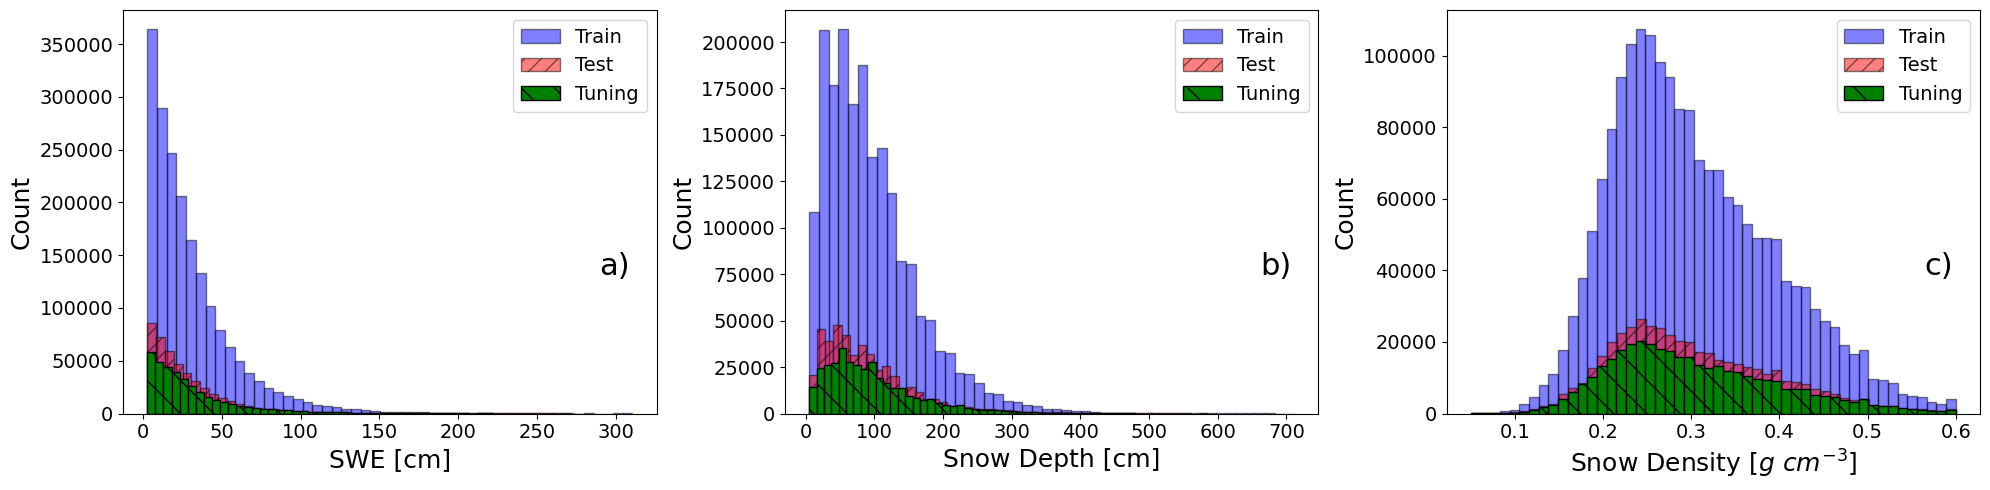

In [22]:
plt.figure(figsize=(20, 5))

for i in range(len(numeric_features_of_interst)):
    plt.subplot(1, 3, i+1)
    plt.hist(combined_df.loc[:, numeric_features_of_interst[i]], label='Train', edgecolor='black', bins=50, alpha=0.5, color='blue', density=False)
    plt.hist(combined_df_test.loc[:, numeric_features_of_interst[i]], label='Test', edgecolor='black', bins=50, alpha=0.5, color='red', hatch='//', density=False)
    plt.hist(combined_df_val.loc[:, numeric_features_of_interst[i]], label='Tuning', edgecolor='black', bins=50, color='green', hatch='\\', density=False)
    plt.xlabel(f"{numeric_features_of_interst[i].replace('_', ' ')} {units[i]}", fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.tick_params(labelsize=14)
    plt.legend(fontsize=14)
    plt.text(0.95, 0.40, f'{chr(97+i)})', transform=plt.gca().transAxes, fontsize=22, va='top', ha='right')


plt.tight_layout()
plt.savefig('../plots/figure5.jpg', dpi=300, bbox_inches='tight')
plt.show()

* More Plots

In [23]:
(
    combined_df
    .filter(items=['SWE', 'Snow_Depth', 'Snow_Density'])
    .corr()
)

,SWE,Snow_Depth,Snow_Density
SWE,1.000000,0.941140,0.520005
Snow_Depth,0.941140,1.000000,0.290397
Snow_Density,0.520005,0.290397,1.000000


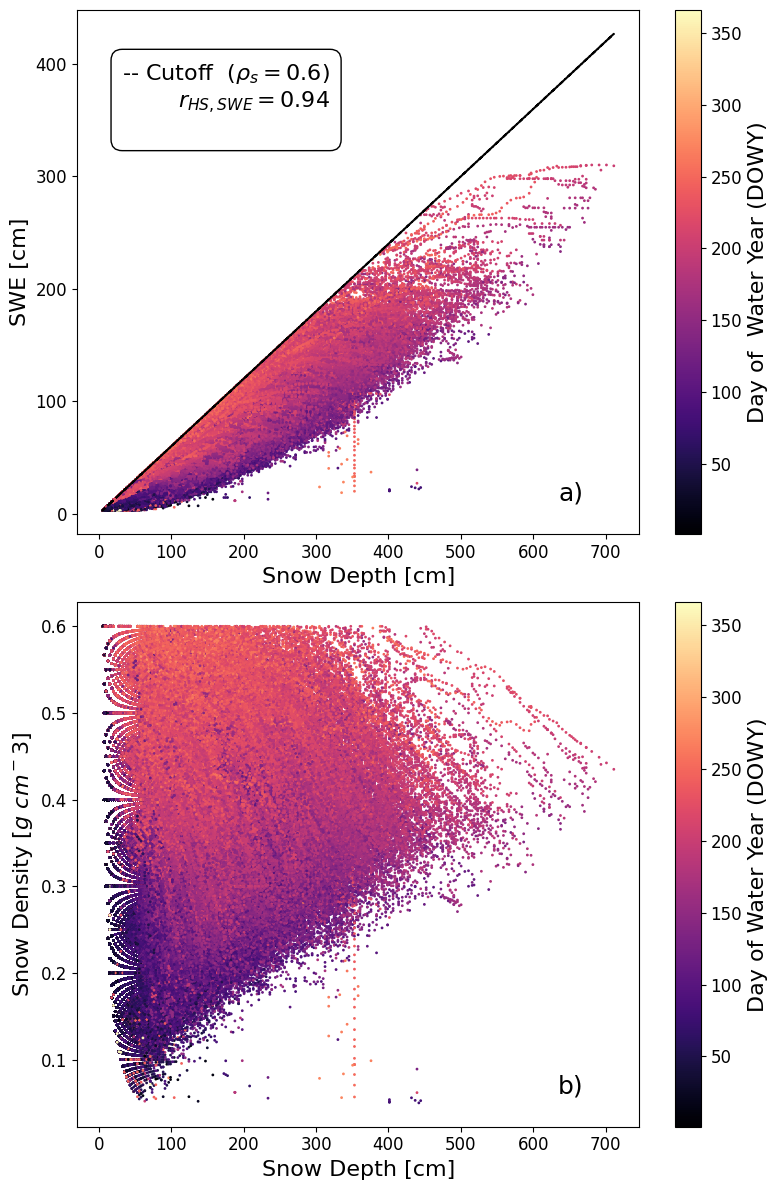

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

text = (
    r"-- Cutoff  ($\rho_s = 0.6$)" "\n"  # Cutoff explanation
    r"$r_{HS, SWE} = 0.94$" "\n"  # Existing text
)

sc = ax[0].scatter(y=combined_df.SWE, x=combined_df.Snow_Depth, cmap='magma', c=combined_df.DOWY, s=1)
cbar=fig.colorbar(sc, ax=ax[0])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Day of  Water Year (DOWY)', fontsize=16)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylabel('SWE [cm]', fontsize=16)
ax[0].set_xlabel('Snow Depth [cm]', fontsize=16)
ax[0].text(0.90, 0.10, 'a)', transform=ax[0].transAxes, fontsize=18, va='top', ha='right')
ax[0].text(0.45, 0.90, text, transform=ax[0].transAxes, fontsize=16, va='top', ha='right',  bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
ax[0].plot(combined_df.Snow_Depth, combined_df.Snow_Depth*0.6, color='black', linestyle='--', linewidth=1.5)



sc = ax[1].scatter(y=combined_df.Snow_Density, x=combined_df.Snow_Depth, cmap='magma', c=combined_df.DOWY, s=1)
cbar=fig.colorbar(sc, ax=ax[1])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Day of Water Year (DOWY)', fontsize=16)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel('Snow Density [$g\ cm{^-3}$]', fontsize=16)
ax[1].set_xlabel('Snow Depth [cm]', fontsize=16)
ax[1].text(0.90, 0.10, 'b)', transform=ax[1].transAxes, fontsize=18, va='top', ha='right')

plt.tight_layout()
plt.savefig('../plots/figure1.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Pickle Splits for Later Use

In [ ]:
with open('../data/data_splits.pkl', 'wb') as f:
    pickle.dump(data_splits, f)


## The End!